import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
%matplotlib inline

plank ile ilgili açıklamalar oluştur

/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


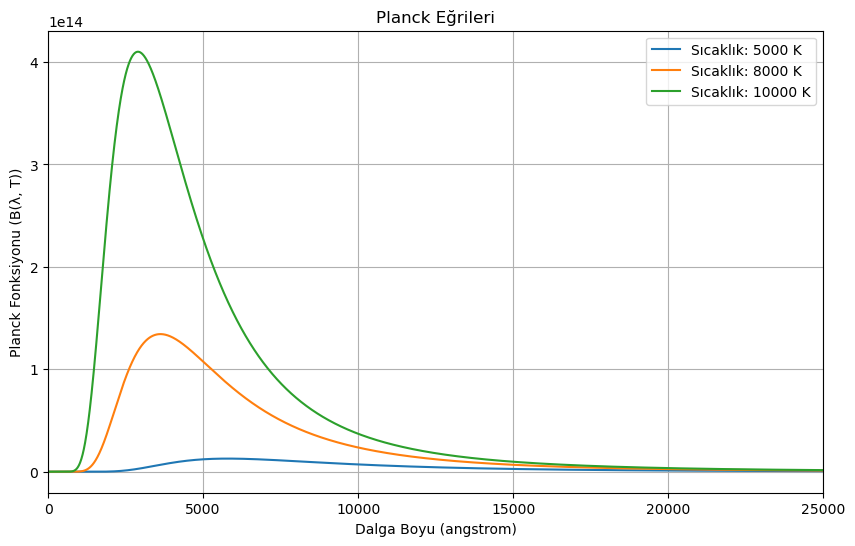

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Sabitler
h = 6.626e-34   # j/s Planck sabiti
c = 2.998e+8   # m/s Işık hızı
k_B = 1.381e-23  # k/j Boltzmann sabiti

# Dalga boyu aralığı (angstrom)
lambdas_angstrom = np.arange(1, 1000000, 10)
lambdas = lambdas_angstrom * 1e-10   # angstrom'u metreye çevirmek için 1e-10 ile çarpıyoruz

# Sıcaklıklar (Kelvin)
T1 = 5000 
T2 = 8000 
T3 = 10000 

# Planck fonksiyonu hesaplama
def planck_function(lambdas, T):
    return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))

# Sıcaklıklar için fonksiyonu çalıştırma
B_lambda_T1 = planck_function(lambdas, T1)
B_lambda_T2 = planck_function(lambdas, T2)
B_lambda_T3 = planck_function(lambdas, T3)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))

plt.plot(lambdas_angstrom, B_lambda_T1, label=f'Sıcaklık: {T1} K')
plt.plot(lambdas_angstrom, B_lambda_T2, label=f'Sıcaklık: {T2} K')
plt.plot(lambdas_angstrom, B_lambda_T3, label=f'Sıcaklık: {T3} K')

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel('Planck Fonksiyonu (B(λ, T))')
plt.title('Planck Eğrileri')
plt.legend()
plt.xlim(0, 25000)
plt.grid(True)
plt.show()

/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


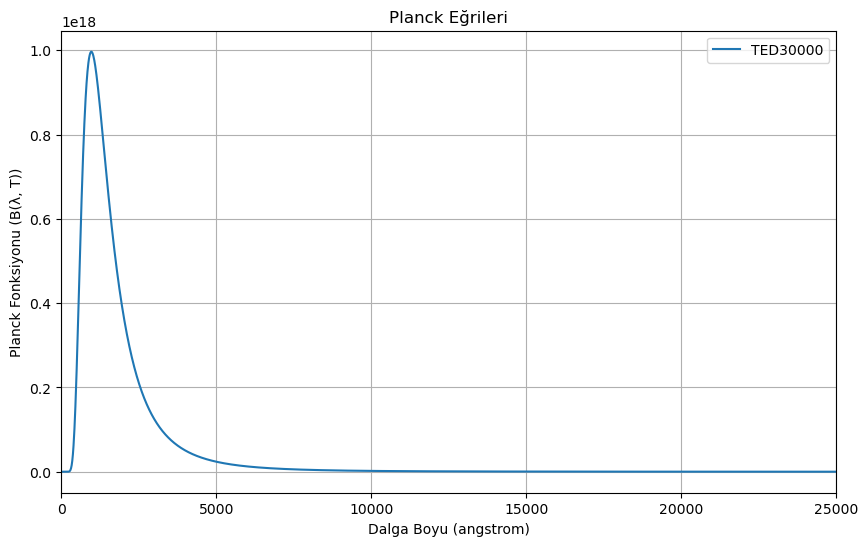

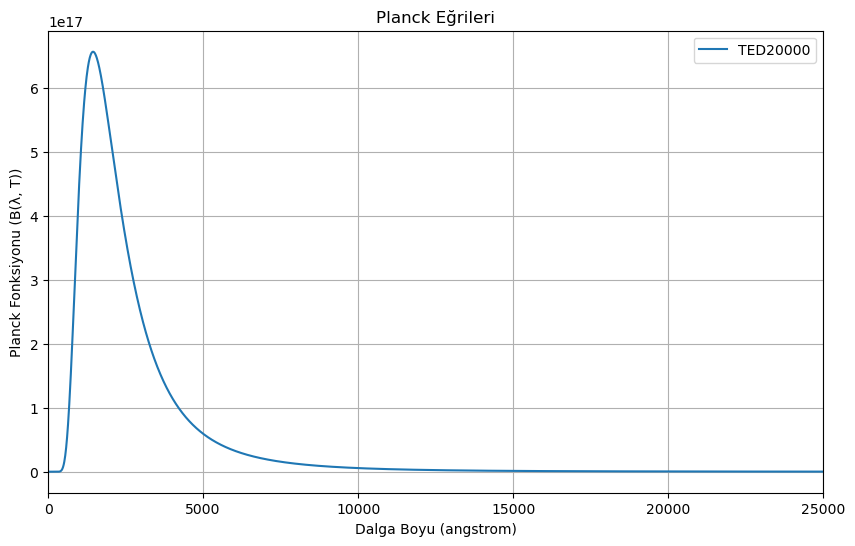

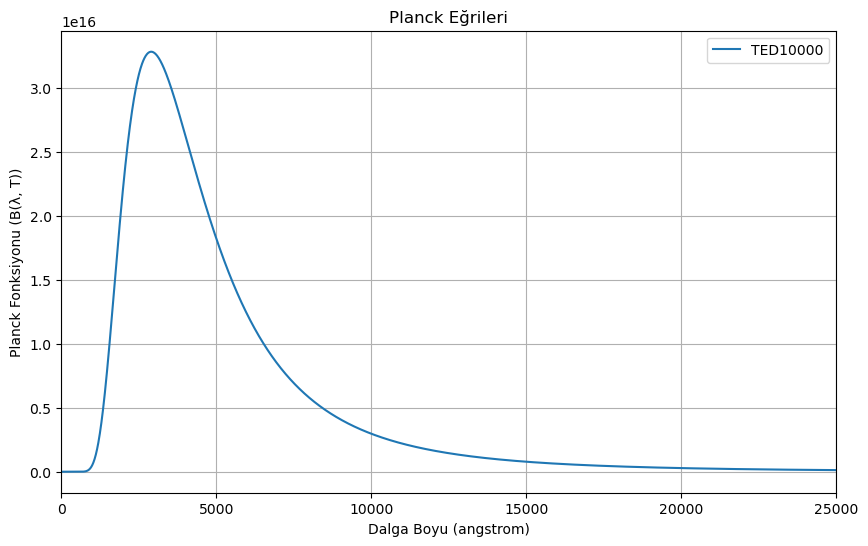

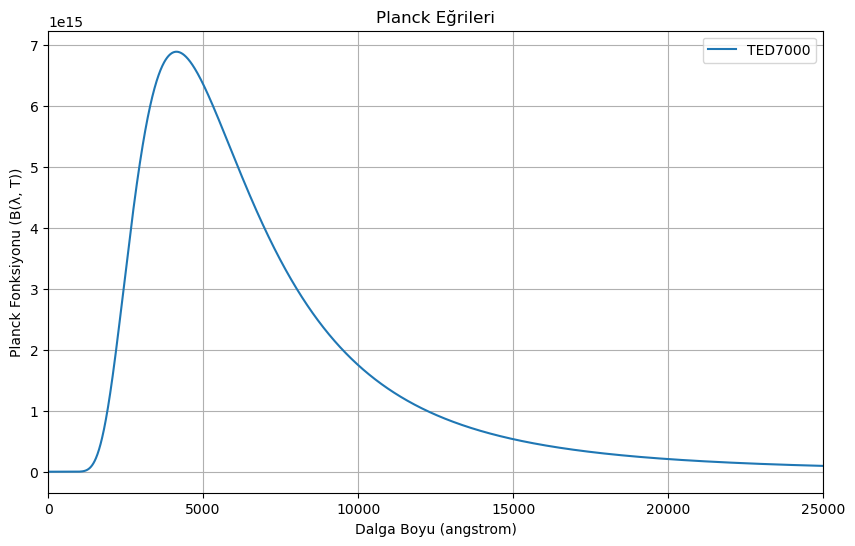

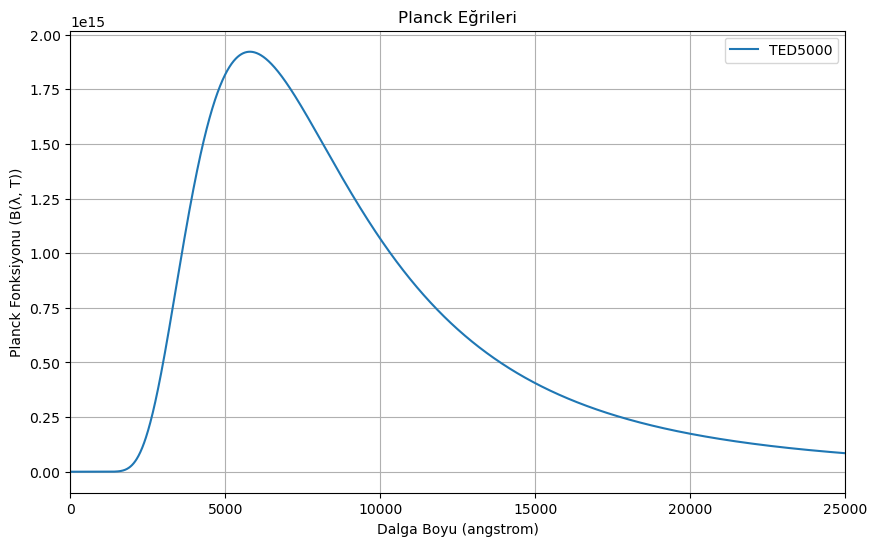

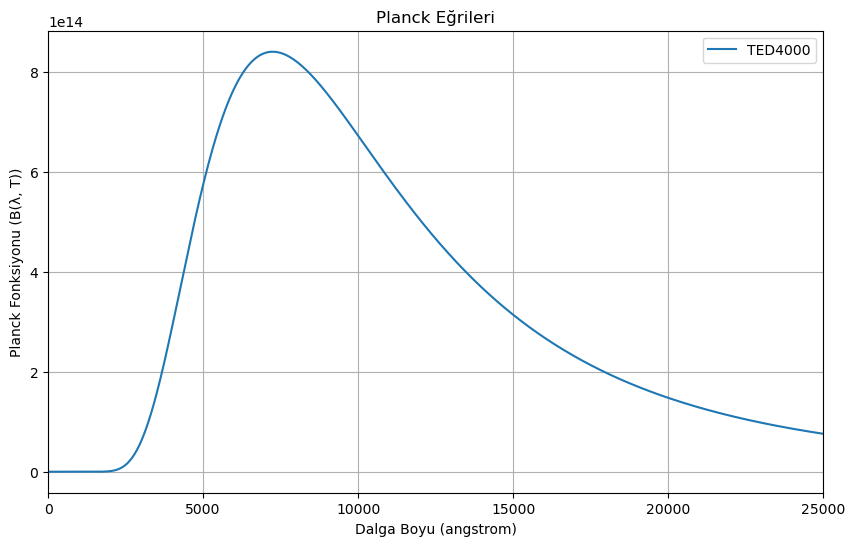

In [3]:
T_list = np.array([30000,20000,10000,7000,5000,4000])
star_counts = np.array([10,50,80,100,150,200])

zips = zip(T_list, star_counts)
sum_plank = 0

for T, count in zips:
    sed = planck_function(lambdas, T) * count
    sum_plank += sed

    plt.figure(figsize=(10, 6))
    plt.plot(lambdas_angstrom, sed, label=f'TED{T}')
    plt.xlabel('Dalga Boyu (angstrom)')
    plt.ylabel('Planck Fonksiyonu (B(λ, T))')
    plt.title('Planck Eğrileri')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 25000)
    plt.show()


/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


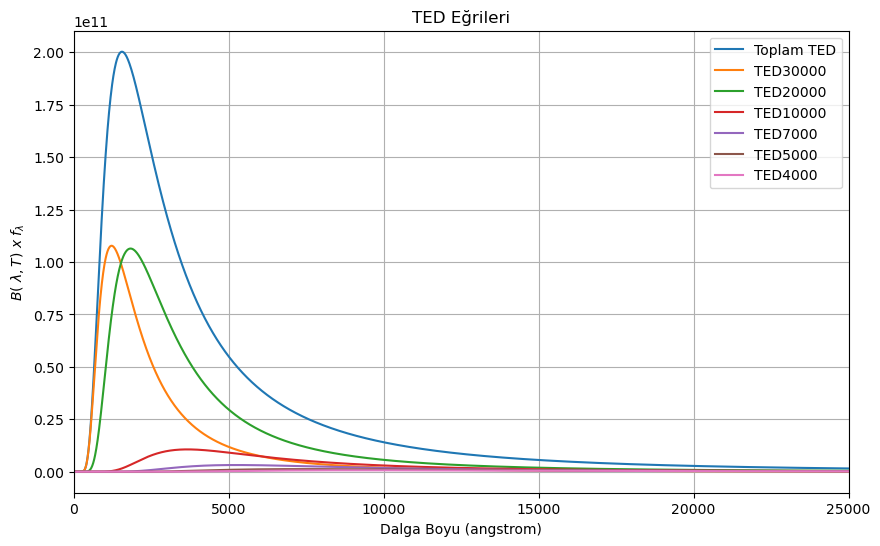

In [4]:
T_list = np.array([30000,20000,10000,7000,5000,4000])
star_counts = np.array([10,50,80,100,150,200])

zips = zip(T_list, star_counts)

plt.figure(figsize=(10, 6))
plt.plot(lambdas_angstrom, sum_plank * lambdas , label=f'Toplam TED')
for T, count in zips:
    plt.plot(lambdas_angstrom, planck_function(lambdas, T) * count * lambdas, label=f'TED{T}')
plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri')
plt.legend()
plt.grid(True)
plt.xlim(0, 25000)
plt.show()

+ Evet hiçbir şey anlaşılmıyor neden aceba? 
+ Ya bu grafiğin eksenleri neden bu kadar büyük sayılarla dolu? 
+ Eee grafiği çizdirdik nasıl yaptığımızı az çok biliyoruz ama nasıl yorumlaylacağız bu grafiği?
+ Eksenler çok büyük eksenlere logaritmik bakalım!

/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


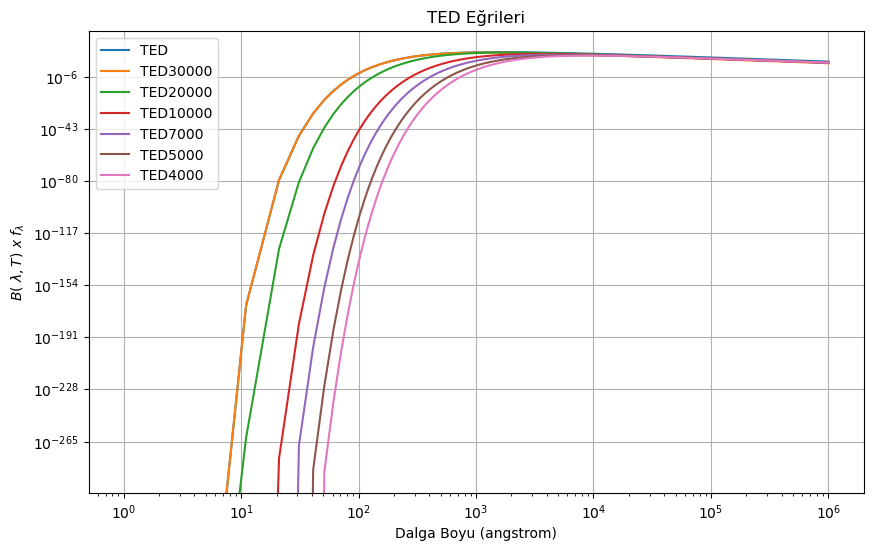

In [5]:
T_list = np.array([30000,20000,10000,7000,5000,4000])
star_counts = np.array([10,50,80,100,150,200])

zips = zip(T_list, star_counts)

plt.figure(figsize=(10, 6))
plt.plot(lambdas_angstrom, sum_plank * lambdas , label=f'TED')
for T, count in zips:
    plt.plot(lambdas_angstrom, planck_function(lambdas, T) * count * lambdas, label=f'TED{T}')

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Logaritmik eksen
plt.yscale('log')  # Logaritmik eksen
plt.show()

/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


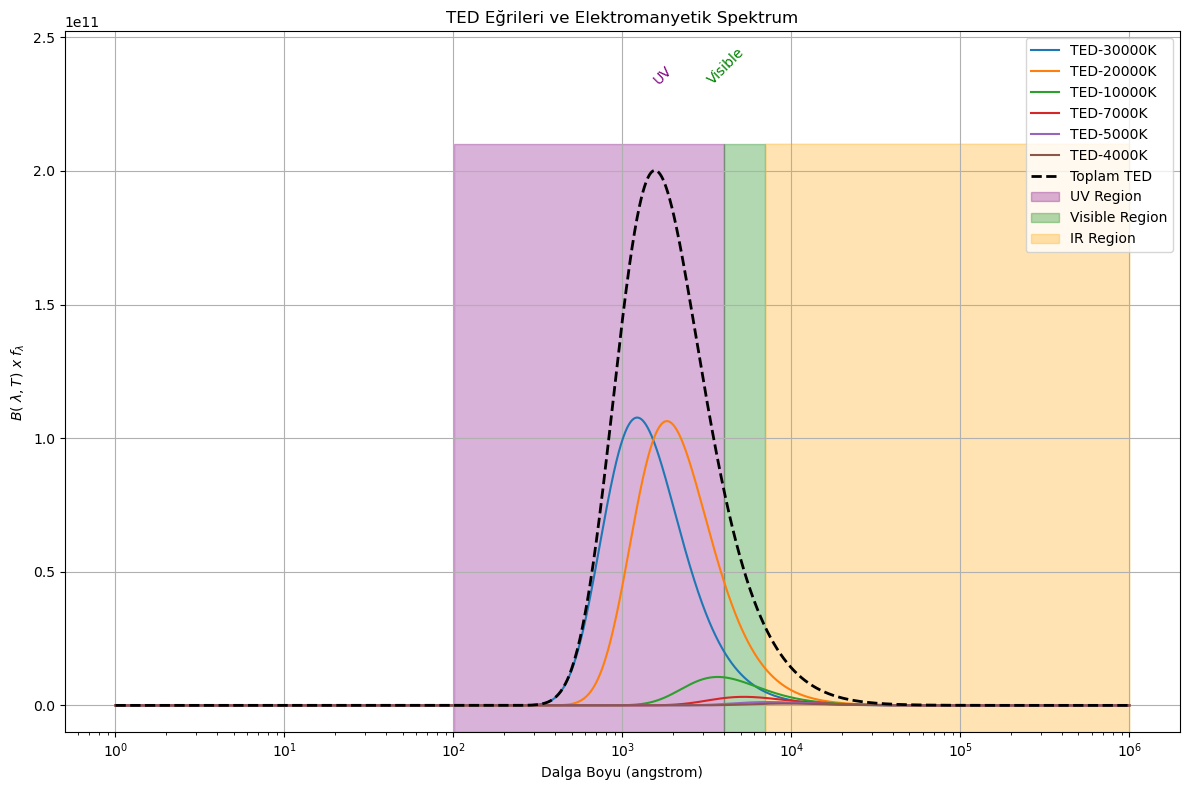

In [6]:

# Spektral bölge sınırları (Angstrom cinsinden)
spectral_regions = {
    'X-rays': (0.1, 100),
    'UV': (100, 4000),
    'Visible': (4000, 7000),
    'IR': (7000, 1e6),
    'Microwave': (1e6, 1e9),
    'Radio': (1e9, 1e11)
}

# TED Eğrisi ve Parametreler
T_list = np.array([30000, 20000, 10000, 7000, 5000, 4000])
star_counts = np.array([10, 50, 80, 100, 150, 200])
zips = zip(T_list, star_counts)

# Ana grafik kodu
plt.figure(figsize=(12, 8))

# Toplam TED'yi hesaplamak için
total_TED = np.zeros_like(lambdas)

# Orijinal grafik çizimi ve toplam TED hesaplama
for T, count in zips:
    planck_vals = planck_function(lambdas, T) * count * lambdas
    plt.plot(lambdas_angstrom, planck_vals, label=f'TED-{T}K')
    
    # Her bir eğriyi toplam TED'ye ekliyoruz
    total_TED += planck_vals

# Toplam TED'yi çiziyoruz
plt.plot(lambdas_angstrom, total_TED, label='Toplam TED', color='black', linewidth=2, linestyle='--')

# Spektral bölgeleri ekleyelim
colors = ['red', 'purple', 'green', 'orange', 'blue', 'gray']
y_min, y_max = plt.ylim()

# Her spektral bölge için fill_between ile renkli alanlar ekleme
for (region, (start, end)), color in zip(spectral_regions.items(), colors):
    if start >= min(lambdas_angstrom) and start <= max(lambdas_angstrom):
        plt.fill_between(lambdas_angstrom, y_min, y_max, where=(lambdas_angstrom >= start) & (lambdas_angstrom <= end), 
                         color=color, alpha=0.3, label=f'{region} Region')

    # Bölge etiketlerini üste yerleştirme
    if start >= min(lambdas_angstrom) and end <= max(lambdas_angstrom):
        center = (start + end) / 2  # Aritmetik orta nokta
        plt.text(center, y_max * 1.1, region, 
                rotation=45, ha='right', va='bottom',
                color=color)

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri ve Elektromanyetik Spektrum')
plt.legend()
plt.grid(True)

# Y eksenini biraz genişletelim, etiketler için yer açmak için
plt.ylim(y_min, y_max * 1.2)

# X eksenini logaritmik ölçeğe alalım
plt.xscale('log')

plt.tight_layout()
plt.show()


/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


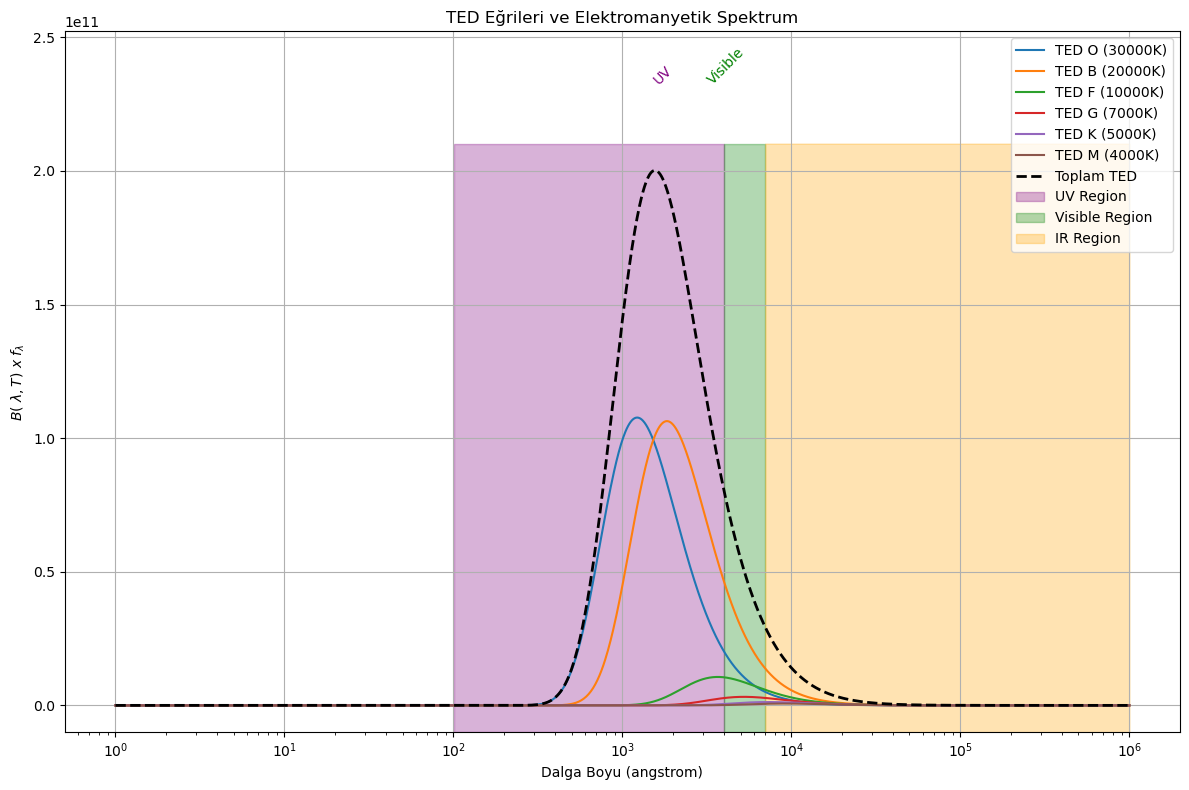

In [7]:

# Tayf sınıflarına göre eşleme yapan bir sözlük oluşturuyoruz
spectral_classes = {
    30000: 'O',
    20000: 'B',
    10000: 'F',
    7000: 'G',
    5000: 'K',
    4000: 'M'
}

# TED Eğrisi ve Parametreler
T_list = np.array([30000, 20000, 10000, 7000, 5000, 4000])
star_counts = np.array([10, 50, 80, 100, 150, 200])
zips = zip(T_list, star_counts)

# Ana grafik kodu
plt.figure(figsize=(12, 8))

# Toplam TED'yi hesaplamak için
total_TED = np.zeros_like(lambdas)

# Orijinal grafik çizimi ve toplam TED hesaplama
for T, count in zips:
    planck_vals = planck_function(lambdas, T) * count * lambdas
    
    # Tayf sınıfını almak ve etiketlemek
    class_label = spectral_classes[T]
    
    # Her bir eğriyi çiziyoruz ve tayf sınıfına göre etiketliyoruz
    plt.plot(lambdas_angstrom, planck_vals, label=f'TED {class_label} ({T}K)')
    
    # Her bir eğriyi toplam TED'ye ekliyoruz
    total_TED += planck_vals

# Toplam TED'yi çiziyoruz
plt.plot(lambdas_angstrom, total_TED, label='Toplam TED', color='black', linewidth=2, linestyle='--')

# Spektral bölgeleri ekleyelim
colors = ['red', 'purple', 'green', 'orange', 'blue', 'gray']
y_min, y_max = plt.ylim()

# Her spektral bölge için fill_between ile renkli alanlar ekleme
for (region, (start, end)), color in zip(spectral_regions.items(), colors):
    if start >= min(lambdas_angstrom) and start <= max(lambdas_angstrom):
        plt.fill_between(lambdas_angstrom, y_min, y_max, where=(lambdas_angstrom >= start) & (lambdas_angstrom <= end), 
                         color=color, alpha=0.3, label=f'{region} Region')

    # Bölge etiketlerini üste yerleştirme
    if start >= min(lambdas_angstrom) and end <= max(lambdas_angstrom):
        center = (start + end) / 2  # Aritmetik orta nokta
        plt.text(center, y_max * 1.1, region, 
                rotation=45, ha='right', va='bottom',
                color=color)

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri ve Elektromanyetik Spektrum')
plt.legend()
plt.grid(True)

# Y eksenini biraz genişletelim, etiketler için yer açmak için
plt.ylim(y_min, y_max * 1.2)

# X eksenini logaritmik ölçeğe alalım
plt.xscale('log')

plt.tight_layout()
plt.show()


/tmp/ipykernel_57862/667115812.py:21: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5 * (np.exp((h * c) / (lambdas * k_B * T)) - 1))


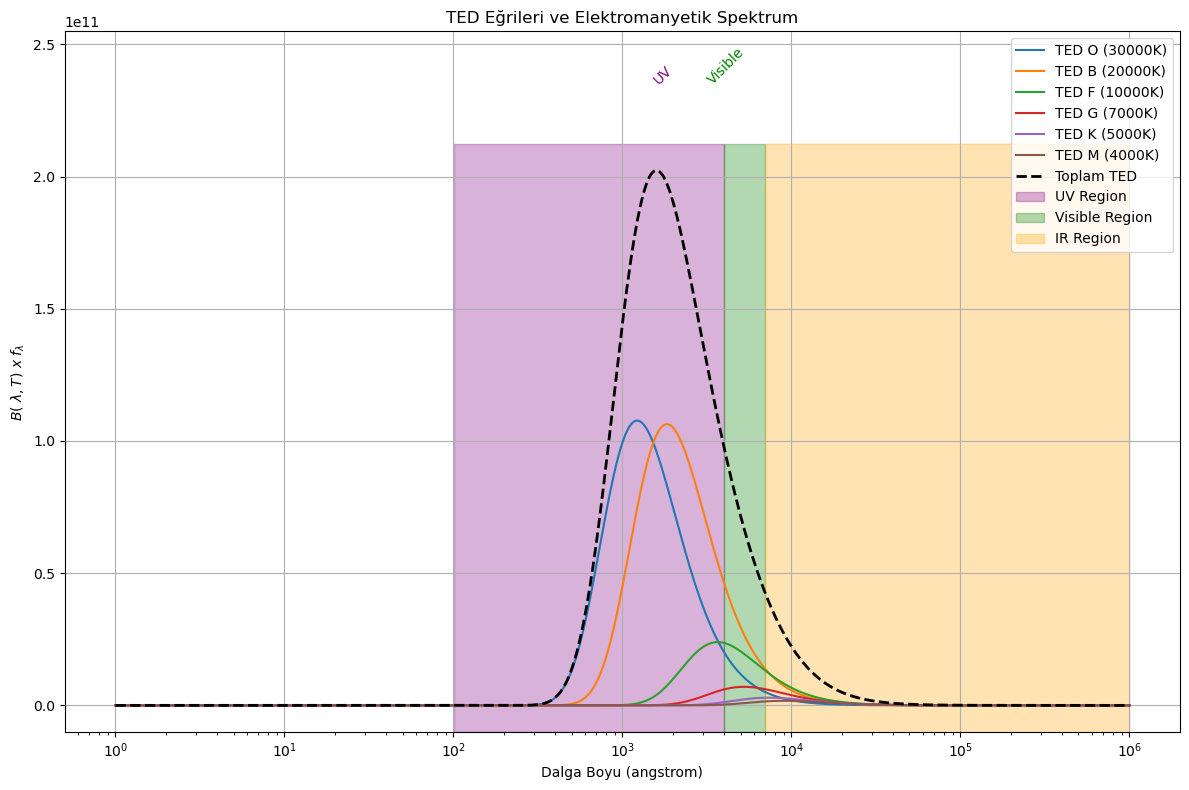

In [13]:

# Tayf sınıflarına göre eşleme yapan bir sözlük oluşturuyoruz
spectral_classes = {
    30000: 'O',
    20000: 'B',
    10000: 'F',
    7000: 'G',
    5000: 'K',
    4000: 'M'
}

# TED Eğrisi ve Parametreler
T_list = np.array([30000, 20000, 10000, 7000, 5000, 4000])
star_counts = np.array([10, 50, 180, 220, 350, 510])
zips = zip(T_list, star_counts)

# Ana grafik kodu
plt.figure(figsize=(12, 8))

# Toplam TED'yi hesaplamak için
total_TED = np.zeros_like(lambdas)

# Orijinal grafik çizimi ve toplam TED hesaplama
for T, count in zips:
    planck_vals = planck_function(lambdas, T) * count * lambdas
    
    # Tayf sınıfını almak ve etiketlemek
    class_label = spectral_classes[T]
    
    # Her bir eğriyi çiziyoruz ve tayf sınıfına göre etiketliyoruz
    plt.plot(lambdas_angstrom, planck_vals, label=f'TED {class_label} ({T}K)')
    
    # Her bir eğriyi toplam TED'ye ekliyoruz
    total_TED += planck_vals

# Toplam TED'yi çiziyoruz
plt.plot(lambdas_angstrom, total_TED, label='Toplam TED', color='black', linewidth=2, linestyle='--')

# Spektral bölgeleri ekleyelim
colors = ['red', 'purple', 'green', 'orange', 'blue', 'gray']
y_min, y_max = plt.ylim()

# Her spektral bölge için fill_between ile renkli alanlar ekleme
for (region, (start, end)), color in zip(spectral_regions.items(), colors):
    if start >= min(lambdas_angstrom) and start <= max(lambdas_angstrom):
        plt.fill_between(lambdas_angstrom, y_min, y_max, where=(lambdas_angstrom >= start) & (lambdas_angstrom <= end), 
                         color=color, alpha=0.3, label=f'{region} Region')

    # Bölge etiketlerini üste yerleştirme
    if start >= min(lambdas_angstrom) and end <= max(lambdas_angstrom):
        center = (start + end) / 2  # Aritmetik orta nokta
        plt.text(center, y_max * 1.1, region, 
                rotation=45, ha='right', va='bottom',
                color=color)

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri ve Elektromanyetik Spektrum')
plt.legend()
plt.grid(True)

# Y eksenini biraz genişletelim, etiketler için yer açmak için
plt.ylim(y_min, y_max * 1.2)

# X eksenini logaritmik ölçeğe alalım
plt.xscale('log')

plt.tight_layout()
plt.show()


/tmp/ipykernel_23299/3523357509.py:11: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5) * (1 / (np.exp(h * c / (lambdas * k * T)) - 1))


X-rays - Start: 1.0000000000000001e-11, End: 1e-08
UV - Start: 1e-08, End: 4.0000000000000003e-07
Visible - Start: 4.0000000000000003e-07, End: 7.000000000000001e-07
IR - Start: 7.000000000000001e-07, End: 0.0001
Microwave - Start: 0.0001, End: 0.1
Radio - Start: 0.1, End: 10.0


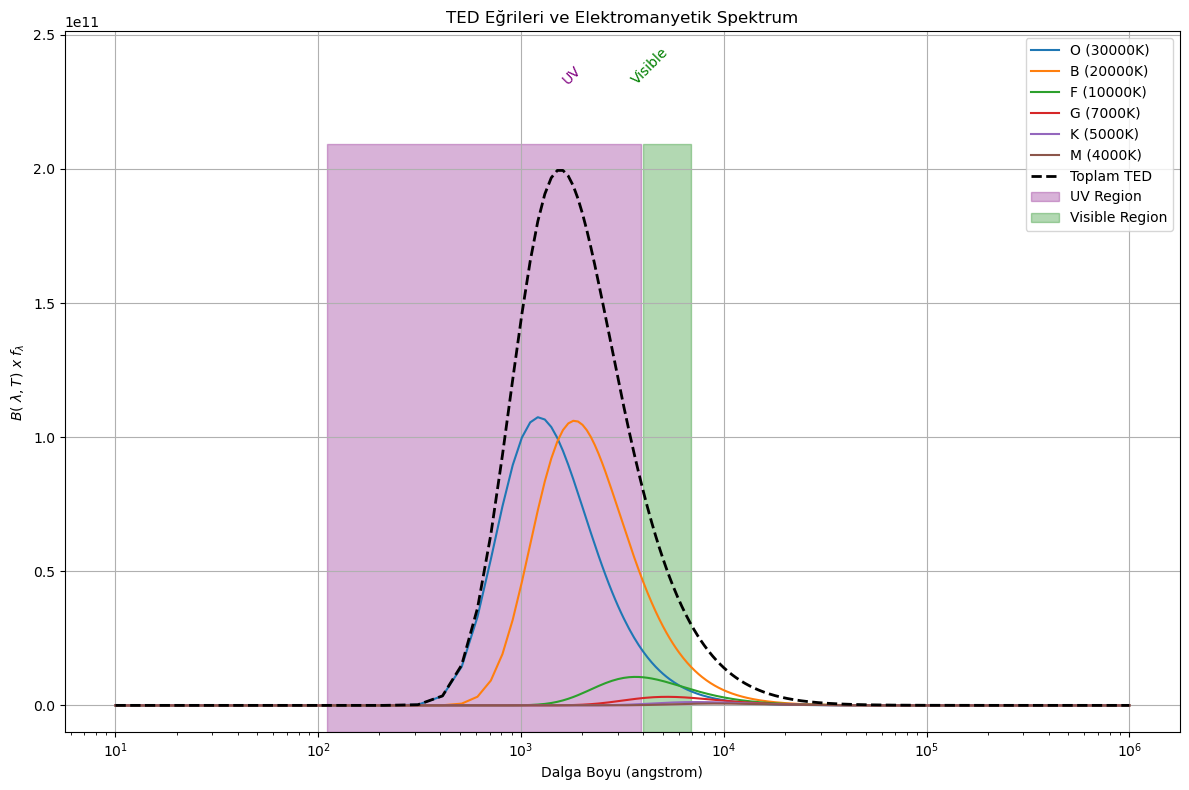

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Planck Fonksiyonu tanımlaması (Bölgesel güç spektrumu)
def planck_function(lambdas, T):
    h = 6.62607015e-34  # Planck sabiti (Joule.s)
    c = 3.0e8  # Işık hızı (m/s)
    k = 1.380649e-23  # Boltzmann sabiti (J/K)
    
    # Planck fonksiyonu: B(λ, T) = (2hc^2 / λ^5) * (1 / (exp(hc / λkT) - 1))
    return (2 * h * c**2) / (lambdas**5) * (1 / (np.exp(h * c / (lambdas * k * T)) - 1))

# Daha geniş bir dalga boyu aralığı
lambdas_angstrom = np.arange(10, 1000000, 100)  # 100 angstrom'dan 1 milyon angstrom'a
lambdas = lambdas_angstrom * 1e-10  # Angstrom'dan metre'ye çevirme

# Spektral bölge sınırları (metre cinsinden)
spectral_regions = {
    'X-rays': (0.1 * 1e-10, 100 * 1e-10),  # 0.1 ve 100 Angstrom'u metreye çeviriyoruz
    'UV': (100 * 1e-10, 4000 * 1e-10),
    'Visible': (4000 * 1e-10, 7000 * 1e-10),
    'IR': (7000 * 1e-10, 1e6 * 1e-10),
    'Microwave': (1e6 * 1e-10, 1e9 * 1e-10),
    'Radio': (1e9 * 1e-10, 1e11 * 1e-10)
}

# Tayf sınıflarına göre eşleme yapan bir sözlük oluşturuyoruz
spectral_classes = {
    30000: 'O',
    20000: 'B',
    10000: 'F',
    7000: 'G',
    5000: 'K',
    4000: 'M'
}

# TED Eğrisi ve Parametreler
T_list = np.array([30000, 20000, 10000, 7000, 5000, 4000])
star_counts = np.array([10, 50, 80, 100, 150, 200])
zips = zip(T_list, star_counts)

# Ana grafik kodu
plt.figure(figsize=(12, 8))

# Toplam TED'yi hesaplamak için
total_TED = np.zeros_like(lambdas)

# Orijinal grafik çizimi ve toplam TED hesaplama
for T, count in zips:
    planck_vals = planck_function(lambdas, T) * count * lambdas
    
    # Tayf sınıfını almak ve etiketlemek
    class_label = spectral_classes[T]
    
    # Her bir eğriyi çiziyoruz ve tayf sınıfına göre etiketliyoruz
    plt.plot(lambdas_angstrom, planck_vals, label=f'{class_label} ({T}K)')
    
    # Her bir eğriyi toplam TED'ye ekliyoruz
    total_TED += planck_vals

# Toplam TED'yi çiziyoruz
plt.plot(lambdas_angstrom, total_TED, label='Toplam TED', color='black', linewidth=2, linestyle='--')

# Spektral bölgeleri ekleyelim
colors = ['red', 'purple', 'green', 'orange', 'blue', 'gray']
y_min, y_max = plt.ylim()

# Her spektral bölge için fill_between ile renkli alanlar ekleme
for (region, (start, end)), color in zip(spectral_regions.items(), colors):
    print(f'{region} - Start: {start}, End: {end}')  # Hata ayıklama: bölge sınırlarını yazdır
    
    if start >= min(lambdas) and end <= max(lambdas):
        plt.fill_between(lambdas_angstrom, y_min, y_max, where=(lambdas >= start) & (lambdas <= end), 
                         color=color, alpha=0.3, label=f'{region} Region')
    
    # Bölge etiketlerini üste yerleştirme
    if start >= min(lambdas) and end <= max(lambdas):
        center = (start + end) / 2  # Aritmetik orta nokta
        plt.text(center * 1e10, y_max * 1.1, region, 
                rotation=45, ha='right', va='bottom',
                color=color)

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri ve Elektromanyetik Spektrum')
plt.legend()
plt.grid(True)

# Y eksenini biraz genişletelim, etiketler için yer açmak için
plt.ylim(y_min, y_max * 1.2)

# X eksenini logaritmik ölçeğe alalım
plt.xscale('log')

plt.tight_layout()
plt.show()


Sentetik galaksi TED'i (tafysal enerji dağlımı) oluşturmaya çalışmak bilmiyoum eğleneceli gelmiyor.. Böyle bir veriyi nasıl yorumlarız ki basit anlamda O - B tayf türünden yıldızların sayıları toplamı az olmasına rağmen toplam Ted değeri bunlara daha yakın, sanki bunlar yön veriyor enerjinin nasıl dağıldığına ama böyle diyemeyiz, ağırlıklı olarak enerji daığılımı O-B tayf türü yıldızlara daha yakındır, temel istatistik, sayısı çok olan F, G, K, M türü yıldızların sayıları fazla olmasına rağmen toplam Tedle kıyasladığımızda tedin biraz genişlemesini yayılmasını sağlıyorlar, bu grafikten bu kadar çıkarabildim gibi başka nasıl bir şekilde yorumlayabiliriz ki?

F, G, K, M türlerindeki yıldızların oluşturduğu eğriler aşağıda kalıyor doğru bir yorum yapamıyorum ki, bu çizdirdiğim grafik sıcaklığa bağlı bir grafik sıcaklığı büyük olan daha büyük eğriye sahip oluyor, grafiği değiştirebilmem için bu türlerdeki yıldız sayısını çok artırmam gerekir acayip derecede deneyelim. 

Bunu tuşlu mu yapsaydık ya sayıyı değiştirdiğimizde değişseydi felan olmaz mı öyle? Similasyon şeklinde... 
Hadi bari düşünelim nasıl simüle edeceğimizi neyi butonlaştıracağımızı

yıldız sayısı olmalı artıp azalacak şekilde her bir tayf türünü bu değerle çarptığmızdan gerekli
yıldız sıcaklığını da butonlaştırsak çok daha iyi olurdu ama şu an bunları yapamam gibi

/tmp/ipykernel_23299/3523357509.py:11: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (lambdas**5) * (1 / (np.exp(h * c / (lambdas * k * T)) - 1))


X-rays - Start: 1.0000000000000001e-11, End: 1e-08
UV - Start: 1e-08, End: 4.0000000000000003e-07
Visible - Start: 4.0000000000000003e-07, End: 7.000000000000001e-07
IR - Start: 7.000000000000001e-07, End: 0.0001
Microwave - Start: 0.0001, End: 0.1
Radio - Start: 0.1, End: 10.0


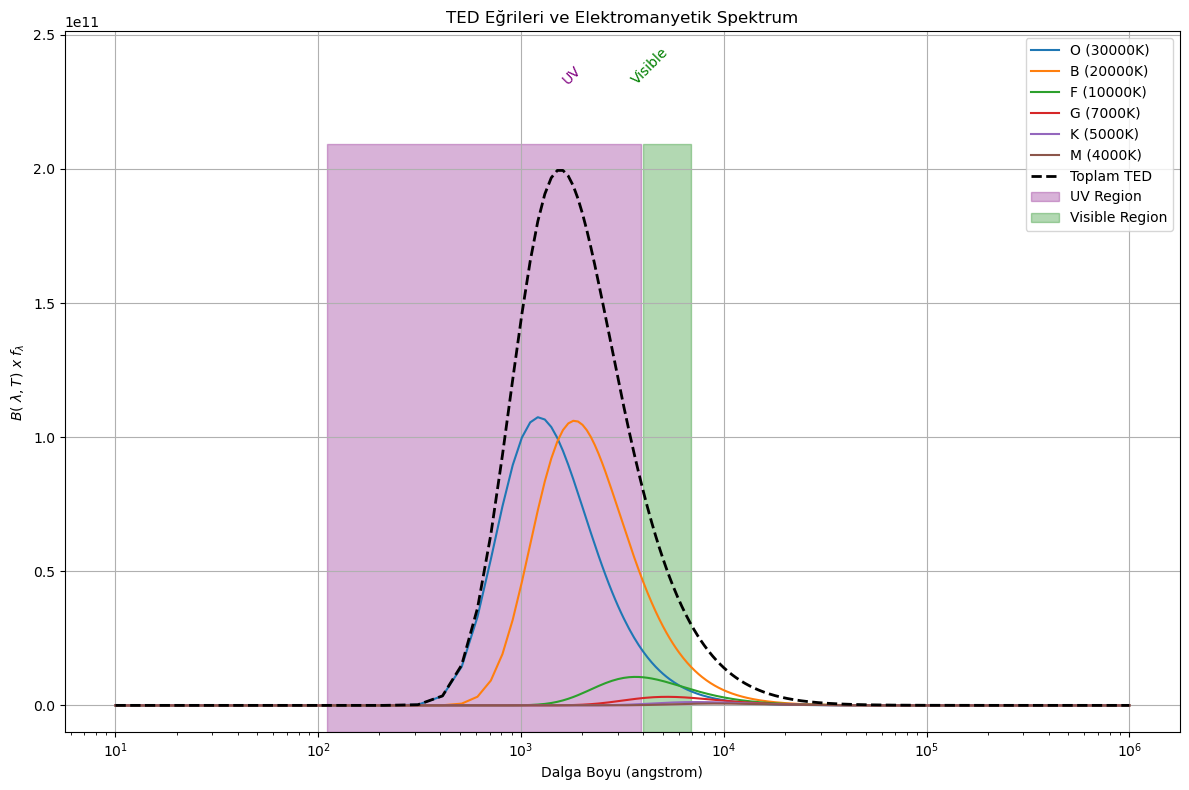

In [ ]:
# TED Eğrisi ve Parametreler
T_list = np.array([30000, 20000, 10000, 7000, 5000, 4000])
star_counts = np.array([10, 50, 80, 100, 150, 200])
zips = zip(T_list, star_counts)

# Ana grafik kodu
plt.figure(figsize=(12, 8))

# Toplam TED'yi hesaplamak için
total_TED = np.zeros_like(lambdas)

# Orijinal grafik çizimi ve toplam TED hesaplama
for T, count in zips: 
    planck_vals = planck_function(lambdas, T) * count * lambdas
    
    # Tayf sınıfını almak ve etiketlemek
    class_label = spectral_classes[T]
    
    # Her bir eğriyi çiziyoruz ve tayf sınıfına göre etiketliyoruz
    plt.plot(lambdas_angstrom, planck_vals, label=f'{class_label} ({T}K)')
    
    # Her bir eğriyi toplam TED'ye ekliyoruz
    total_TED += planck_vals

# Toplam TED'yi çiziyoruz
plt.plot(lambdas_angstrom, total_TED, label='Toplam TED', color='black', linewidth=2, linestyle='--')

# Spektral bölgeleri ekleyelim
colors = ['red', 'purple', 'green', 'orange', 'blue', 'gray']
y_min, y_max = plt.ylim()

# Her spektral bölge için fill_between ile renkli alanlar ekleme
for (region, (start, end)), color in zip(spectral_regions.items(), colors):
    print(f'{region} - Start: {start}, End: {end}')  # Hata ayıklama: bölge sınırlarını yazdır
    
    if start >= min(lambdas) and end <= max(lambdas):
        plt.fill_between(lambdas_angstrom, y_min, y_max, where=(lambdas >= start) & (lambdas <= end), 
                         color=color, alpha=0.3, label=f'{region} Region')
    
    # Bölge etiketlerini üste yerleştirme
    if start >= min(lambdas) and end <= max(lambdas):
        center = (start + end) / 2  # Aritmetik orta nokta
        plt.text(center * 1e10, y_max * 1.1, region, 
                rotation=45, ha='right', va='bottom',
                color=color)

plt.xlabel('Dalga Boyu (angstrom)')
plt.ylabel(r'$B(\ \lambda, T)\ x \ f_{\lambda} $')
plt.title('TED Eğrileri ve Elektromanyetik Spektrum')
plt.legend()
plt.grid(True)

# Y eksenini biraz genişletelim, etiketler için yer açmak için
plt.ylim(y_min, y_max * 1.2)

# X eksenini logaritmik ölçeğe alalım
plt.xscale('log')

plt.tight_layout()
plt.show()